In [56]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns 
import matplotlib.patches as mpatches

1- Fonte do arquivo: https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate

In [57]:
#lendo o arquivo
cervejas_data = pd.read_csv("C:/Users/Caroline/OneDrive/Área de Trabalho/Rol/projetos/cervejas/beer_reviews.csv")
cervejas_data.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [58]:
cervejas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [59]:
cervejas_data.describe()

,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,7.933065e+05,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,4.580162e+05,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,0.000000e+00,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,3.966532e+05,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,7.933065e+05,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,1.189960e+06,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,1.586613e+06,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Quais são as características mais comuns das cervejas avaliadas? (ex: teor alcoólico, IBU, estilo)
Qual é a correlação entre o teor alcoólico e a pontuação geral da cerveja?
Quais são os estilos de cerveja mais bem avaliados?
Qual é a média de pontuação por estado/região nos Estados Unidos?
É possível prever a pontuação geral de uma cerveja com base em suas características?

In [60]:
print(cervejas_data.isnull().sum())

index                     0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


Limpeza inicial dos dados
Vamos remover a coluna de "review_profilename" que contém o nome dos perfis que participaram da classificação das cervejas.
Este dado não é necessário para a análise e o modelo de machine learning que vamos desenvolver. Além disso, é necessário limpar a coluna "brewery_name" e "beer_abv"

In [61]:
#removendo a coluna com informações dos perfis de usuários
cervejas_data = cervejas_data.drop(columns = ["review_profilename", "review_time"])
cervejas_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1586614 non-null  int64  
 1   brewery_id         1586614 non-null  int64  
 2   brewery_name       1586599 non-null  object 
 3   review_overall     1586614 non-null  float64
 4   review_aroma       1586614 non-null  float64
 5   review_appearance  1586614 non-null  float64
 6   beer_style         1586614 non-null  object 
 7   review_palate      1586614 non-null  float64
 8   review_taste       1586614 non-null  float64
 9   beer_name          1586614 non-null  object 
 10  beer_abv           1518829 non-null  float64
 11  beer_beerid        1586614 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 145.3+ MB


In [62]:
#descrição das cervejarias e contagem de cervjas por cervejaria
print(cervejas_data['brewery_name'].unique().shape)
print(cervejas_data['brewery_name'].value_counts())

(5743,)
brewery_name
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Brauerei Stolz GmbH & Co. KG              1
Hausbrauerei Düll                         1
Browar Grybów                             1
Staro&#269;eský Pivovárek Dobruka        1
Spire Brewery                             1
Name: count, Length: 5742, dtype: int64


In [63]:
#descrição dos tipos de cerveja
print(cervejas_data['beer_style'].unique().shape)
print(cervejas_data['beer_style'].value_counts())

(104,)
beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: count, Length: 104, dtype: int64


In [64]:
#removendo os dados nulos
cervejas_data.dropna(inplace = True)

In [65]:
#checando os dados
print(cervejas_data.isnull().sum())

index                0
brewery_id           0
brewery_name         0
review_overall       0
review_aroma         0
review_appearance    0
beer_style           0
review_palate        0
review_taste         0
beer_name            0
beer_abv             0
beer_beerid          0
dtype: int64


In [66]:
#removendo duplicatas
cervejas_data = cervejas_data.drop_duplicates()
cervejas_data.head()

,index,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [67]:
#Quais são os estilos de cerveja mais bem avaliados?

top_estilos = cervejas_data.groupby("beer_style")["review_overall"].mean().sort_values(ascending=False).head(10)
print(top_estilos)


beer_style
American Wild Ale                   4.100379
Gueuze                              4.087283
Quadrupel (Quad)                    4.073120
Lambic - Unblended                  4.060635
American Double / Imperial Stout    4.030611
Russian Imperial Stout              4.024676
Weizenbock                          4.011188
American Double / Imperial IPA      4.000352
Flanders Red Ale                    3.995810
Rye Beer                            3.989004
Name: review_overall, dtype: float64


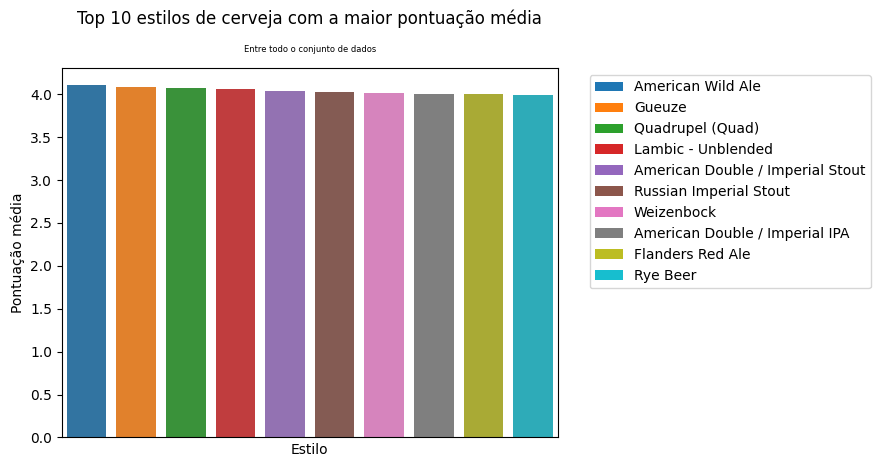

In [68]:
#plotando o gráfico para visulizar os estilos mais bem avaliados

from matplotlib.patches import Patch

sns.barplot(x = top_estilos.index, y = top_estilos.values)
plt.title("Top 10 estilos de cerveja com a maior pontuação média", pad = 18, y = 1.05)
plt.text(0.5, 1.05, 'Entre todo o conjunto de dados',
        ha ='center', va ='center', fontsize = 6, transform = plt.gca().transAxes)
plt.xlabel("Estilo")
plt.ylabel("Pontuação média")
plt.xticks(ticks= [])
# Customização da legenda com as cores das barras
patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in sns.color_palette()[:len(top_estilos)]]
plt.legend(patches, top_estilos.index, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

In [69]:
#Visualizando as 150 melhores cervejarias 

#pontuação média 

med_cervejarias = cervejas_data.groupby("brewery_name").agg({'review_overall':'mean', 'beer_name':'count'}).reset_index()
med_cervejarias = med_cervejarias.rename(columns={'brewery_name': 'Cervejaria', 'review_overall':'Classificação' , 'beer_name': 'nº de cervejas'})
med_cervejarias = med_cervejarias.sort_values(by = 'Classificação', ascending = False).reset_index(drop=True)


In [70]:
top_cervejarias = med_cervejarias.head(10)
top_cervejarias.head()

,Cervejaria,Classificação,nº de cervejas
0,Thai Me Up,5.0,1
1,Kunino Cho,5.0,1
2,Bad Wörishofer Lowenbrau / Privatbrauerei Hote...,5.0,1
3,SandLot Brewery @ Coors Field,5.0,1
4,Brasserie Oxymore,5.0,1


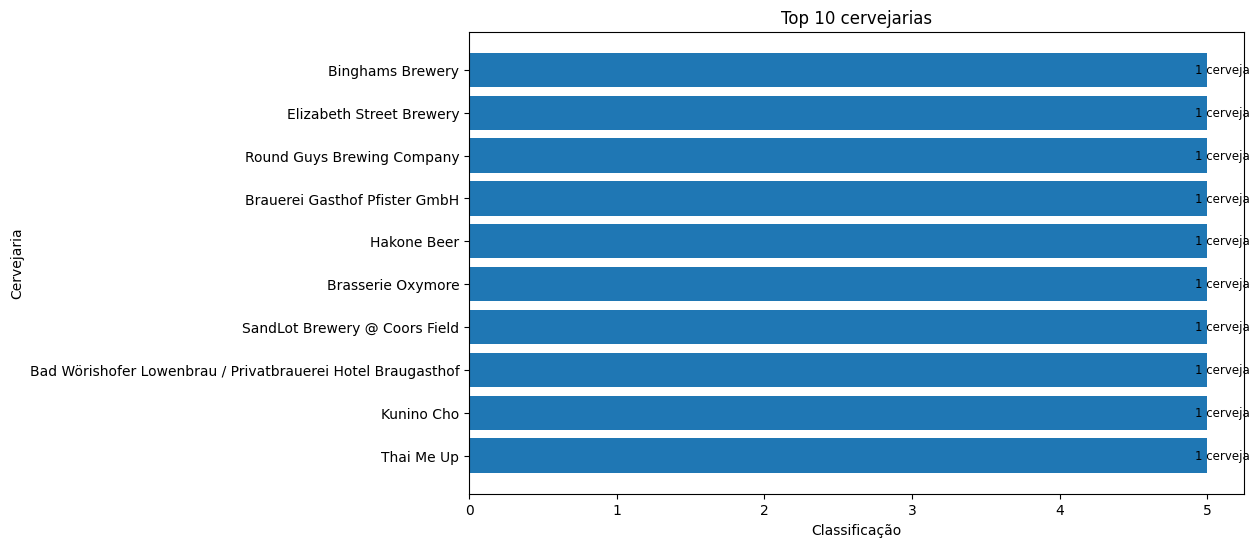

In [71]:
#dados
cervejarias = top_cervejarias['Cervejaria']
classificações = top_cervejarias['Classificação']
num_cervejas = top_cervejarias['nº de cervejas']

#plotando o gráfico 
plt.figure(figsize = (10, 6))
plt.barh(np.arange(len(cervejarias)), classificações)
for i, num_cervejas in enumerate(num_cervejas):
    plt.text(classificações[i] + 0.1, i, f"{num_cervejas} cerveja", va = 'center', ha = 'center', fontsize = 8.5)
plt.title('Top 10 cervejarias')
plt.yticks(np.arange(len(cervejarias)), cervejarias)
plt.xlabel('Classificação')
plt.ylabel('Cervejaria')
plt.show()

Investigando as características das cervejas avaliadas



In [72]:
print(cervejas_data['beer_abv'].unique().shape)
print(cervejas_data['beer_abv'].value_counts())

(530,)
beer_abv
5.00     109143
8.00      67744
6.00      65383
7.00      59459
9.00      59183
          ...  
7.17          1
7.74          1
17.35         1
3.53          1
0.08          1
Name: count, Length: 530, dtype: int64


In [73]:
#selecionando apenas as 250 melhores cervejas 
top_250_beers = cervejas_data.sort_values(by='review_overall', ascending=False)
top_250_cervejas = top_250_beers.head(250)


In [74]:
top_250_cervejas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1586613 to 1233362
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              250 non-null    int64  
 1   brewery_id         250 non-null    int64  
 2   brewery_name       250 non-null    object 
 3   review_overall     250 non-null    float64
 4   review_aroma       250 non-null    float64
 5   review_appearance  250 non-null    float64
 6   beer_style         250 non-null    object 
 7   review_palate      250 non-null    float64
 8   review_taste       250 non-null    float64
 9   beer_name          250 non-null    object 
 10  beer_abv           250 non-null    float64
 11  beer_beerid        250 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 25.4+ KB


In [75]:
top_250_cervejas.describe()

,index,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,2.500000e+02,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,7.990042e+05,2700.252000,5.0,3.988000,4.052000,4.176000,4.284000,6.832400,19507.124000
std,4.722225e+05,4935.608341,0.0,0.747053,0.788532,0.735655,0.686461,2.084257,21283.909705
min,2.242540e+05,45.000000,5.0,1.000000,1.000000,1.000000,1.000000,0.500000,262.000000
25%,2.263322e+05,158.000000,5.0,3.500000,3.500000,4.000000,4.000000,5.100000,976.000000
50%,8.151940e+05,342.000000,5.0,4.000000,4.000000,4.500000,4.500000,5.900000,19216.000000
75%,1.234486e+06,864.000000,5.0,4.500000,4.500000,4.500000,4.500000,9.500000,34077.750000
max,1.586613e+06,23122.000000,5.0,5.000000,5.000000,5.000000,5.000000,11.000000,73309.000000


C:\Users\Caroline\AppData\Local\Temp\ipykernel_18520\282186942.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  teor_colors = plt.cm.get_cmap('Purples')
C:\Users\Caroline\AppData\Local\Temp\ipykernel_18520\282186942.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


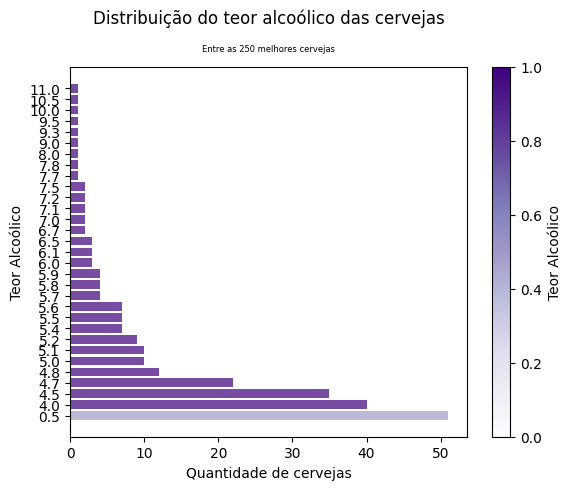

In [76]:
# Calculando a quantidade de cervejas com cada teor alcoólico
teor_alcoolico = top_250_cervejas['beer_abv'].value_counts().dropna()

# Obtendo os valores únicos do teor alcoólico e a quantidade correspondente
teor_unico = teor_alcoolico.index
quantidade = teor_alcoolico.values

# Gerando uma sequência numérica para representar os valores únicos do teor alcoólico
sorted_indices = np.argsort(teor_unico)
teor_unico = teor_unico[sorted_indices]
x = np.arange(len(teor_unico)) + 1

#escala de cores
teor_colors = plt.cm.get_cmap('Purples')

# Plotando o gráfico 
plt.barh(x, quantidade, height = 0.8, color = teor_colors(teor_unico), alpha=0.7)
# Configurando a barra de cores
sm = plt.cm.ScalarMappable(cmap = teor_colors)
cbar = plt.colorbar(sm)
cbar.set_label('Teor Alcoólico')
plt.title('Distribuição do teor alcoólico das cervejas', pad = 18, y = 1.05)
plt.text(0.5, 1.05, 'Entre as 250 melhores cervejas',
        ha ='center', va ='center', fontsize = 6, transform = plt.gca().transAxes)
plt.xlabel('Quantidade de cervejas')
plt.ylabel('Teor Alcoólico')
plt.yticks(x, teor_unico)
plt.show()


C:\Users\Caroline\AppData\Local\Temp\ipykernel_18520\2878445306.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples_r')


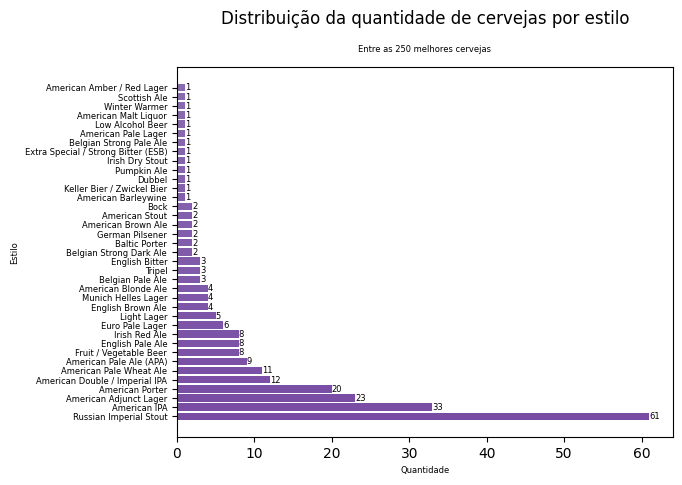

In [77]:
# Calculando a quantidade de cervejas com cada estilo
estilo = top_250_cervejas['beer_style'].value_counts().dropna()

#obtendo os valores únicos do estilo e quantidade correspondente
estilo_unico = estilo.index
quantidade = estilo.values
x = np.arange(len(estilo_unico))

# Escolhendo uma paleta de cores
cmap = plt.cm.get_cmap('Purples_r')

# Plotando o gráfico 
plt.barh(x, quantidade, height = 0.8, color = cmap(x), alpha = 0.7)
plt.title('Distribuição da quantidade de cervejas por estilo', pad = 18, y = 1.05)
plt.text(0.5, 1.05, 'Entre as 250 melhores cervejas',
        ha ='center', va ='center', fontsize = 6, transform = plt.gca().transAxes)
plt.xlabel('Quantidade', fontsize = 6)
plt.ylabel('Estilo', fontsize = 6)
plt.yticks(x, estilo_unico, fontsize = 6)
for i, v in enumerate(quantidade):
    plt.text(v, i, str(v), color ='black', va ='center', fontsize = 6)
plt.show()

Descobrindo se existe correlação entre as variáveis relacionadas as características avaliadas.
Como algumas das nossas variáveis são qualitativas (objects), vamos precisar transformá-las para entender a correlação entre os dados. Além disso, a transformação para dados quantitativos também se fará necessária para a construção do nosso modelo de machine-learning mais adiante.

In [78]:
cervejas_data.select_dtypes(include='object').describe()

,brewery_name,beer_style,beer_name
count,1518814,1518814,1518814
unique,5155,104,44076
top,Boston Beer Company (Samuel Adams),American IPA,90 Minute IPA
freq,38812,113162,3290


In [79]:
#descobrindo se existe correlação entre as variáveis relacionadas as características avaliadas 

#transformar as colunas do tipo object em int
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cervejas_data['beer_style_int'] = label_encoder.fit_transform(cervejas_data['beer_style'])
cervejas_data['brewery_name_int'] = label_encoder.fit_transform(cervejas_data['brewery_name'])
cervejas_data['beer_name_int'] = label_encoder.fit_transform(cervejas_data['beer_name'])


In [80]:
cervejas_data.head()

,index,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_style_int,brewery_name_int,beer_name_int
0,0,10325,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,65,4886,34372
1,1,10325,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,51,4886,32298
2,2,10325,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,59,4886,5314
3,3,10325,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,61,4886,34371
4,4,1075,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,9,1360,8746


In [81]:
cervejas_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518814 entries, 0 to 1586613
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1518814 non-null  int64  
 1   brewery_id         1518814 non-null  int64  
 2   brewery_name       1518814 non-null  object 
 3   review_overall     1518814 non-null  float64
 4   review_aroma       1518814 non-null  float64
 5   review_appearance  1518814 non-null  float64
 6   beer_style         1518814 non-null  object 
 7   review_palate      1518814 non-null  float64
 8   review_taste       1518814 non-null  float64
 9   beer_name          1518814 non-null  object 
 10  beer_abv           1518814 non-null  float64
 11  beer_beerid        1518814 non-null  int64  
 12  beer_style_int     1518814 non-null  int32  
 13  brewery_name_int   1518814 non-null  int32  
 14  beer_name_int      1518814 non-null  int32  
dtypes: float64(6), int32(3), int64(3), ob

In [82]:
cervejas_data.select_dtypes(include='int').describe()

,index,brewery_id,beer_beerid,beer_style_int,brewery_name_int,beer_name_int
count,1.518814e+06,1.518814e+06,1.518814e+06,1.518814e+06,1.518814e+06,1.518814e+06
mean,7.921338e+05,3.074038e+03,2.140359e+04,4.221748e+01,2.619459e+03,2.259850e+04
std,4.589528e+05,5.543976e+03,2.177937e+04,3.303752e+01,1.557927e+03,1.279838e+04
min,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.938462e+05,1.410000e+02,1.654000e+03,1.200000e+01,1.216000e+03,1.165700e+04
50%,7.914545e+05,4.170000e+02,1.282450e+04,3.100000e+01,2.545000e+03,2.320300e+04
75%,1.188907e+06,2.298000e+03,3.923600e+04,7.400000e+01,4.136000e+03,3.407200e+04
max,1.586613e+06,2.800300e+04,7.731600e+04,1.030000e+02,5.154000e+03,4.407500e+04


In [83]:
print(cervejas_data['beer_style_int'].unique().shape)
print(cervejas_data['beer_style_int'].value_counts())

(104,)
beer_style_int
12    113162
9      85124
14     58081
89     53432
11     50146
       ...  
48       649
56       609
88       395
64       237
72       229
Name: count, Length: 104, dtype: int64


In [84]:
cervejas_data.columns

Index(['index', 'brewery_id', 'brewery_name', 'review_overall', 'review_aroma',
       'review_appearance', 'beer_style', 'review_palate', 'review_taste',
       'beer_name', 'beer_abv', 'beer_beerid', 'beer_style_int',
       'brewery_name_int', 'beer_name_int'],
      dtype='object')

In [85]:
colunas = ['index', 'brewery_id','review_overall', 'review_aroma',
       'review_appearance','review_palate', 'review_taste',
       'beer_abv', 'beer_beerid', 'beer_style_int',
       'brewery_name_int', 'beer_name_int']
cervejas = cervejas_data [colunas]

In [86]:
# Calcular a correlação
corr_cervejas = cervejas.corr(method='pearson')

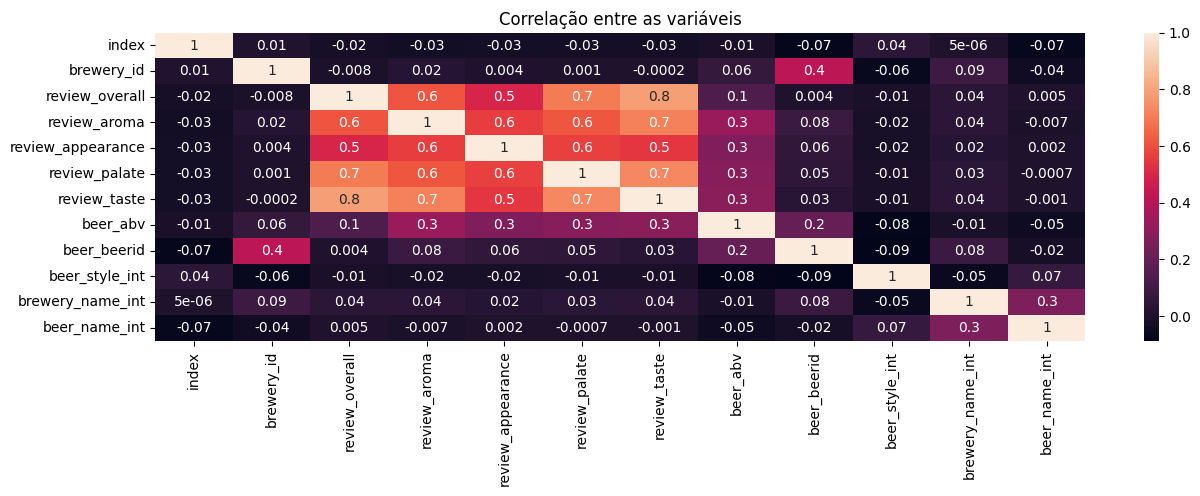

In [87]:
#plotando a tabela de visualização das correlações

plt.figure(figsize=(15,4))
sns.heatmap(corr_cervejas, annot=True, fmt=".1g")
plt.title("Correlação entre as variáveis")
plt.show()

Pré-processamento dos dados


Vamos construir um modelo de machine learning, utilizando o algoritmo KNN, com o objetivo de prever a pontuação geral de uma cerveja com base em suas características, como teor alcoólico, IBU e estilo.

In [88]:
cervejas.head()

,index,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_style_int,brewery_name_int,beer_name_int
0,0,10325,1.5,2.0,2.5,1.5,1.5,5.0,47986,65,4886,34372
1,1,10325,3.0,2.5,3.0,3.0,3.0,6.2,48213,51,4886,32298
2,2,10325,3.0,2.5,3.0,3.0,3.0,6.5,48215,59,4886,5314
3,3,10325,3.0,3.0,3.5,2.5,3.0,5.0,47969,61,4886,34371
4,4,1075,4.0,4.5,4.0,4.0,4.5,7.7,64883,9,1360,8746


In [89]:
cervejas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518814 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1518814 non-null  int64  
 1   brewery_id         1518814 non-null  int64  
 2   review_overall     1518814 non-null  float64
 3   review_aroma       1518814 non-null  float64
 4   review_appearance  1518814 non-null  float64
 5   review_palate      1518814 non-null  float64
 6   review_taste       1518814 non-null  float64
 7   beer_abv           1518814 non-null  float64
 8   beer_beerid        1518814 non-null  int64  
 9   beer_style_int     1518814 non-null  int32  
 10  brewery_name_int   1518814 non-null  int32  
 11  beer_name_int      1518814 non-null  int32  
dtypes: float64(6), int32(3), int64(3)
memory usage: 133.3 MB


In [90]:
#importando bibliotecas 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

Precisamos estabelecer um filtro de valor, para o que consideramos uma boa avaliação para um cerveja.

In [91]:
# Filtrar os dados para classificações entre 4 e 5
filtered_data = cervejas[(cervejas['review_overall'] >= 4) & (cervejas['review_overall'] <= 5)]


Em seguida, passaremos para a etapa de modelagem. Definiremos uma semente global para essa célula de código e criaremos os modelos com os algoritmos regressão linear, regressão linear com regularização Ridge, regressão linear com regularização Lasso, KNN, árvore de regressão e SVM, adicionando-os em uma lista.

In [92]:
# Pré-processar os dados
X = filtered_data.drop('review_overall', axis=1)
y = filtered_data['review_overall']

SEED = 37657
np.random.seed(SEED)

# Dividir os dados em conjunto de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [93]:
#Normalização min-max das características numéricas
numeric_columns = ['beer_abv'] 
scaler = MinMaxScaler()
X_treino_scaled = X_treino.copy()
X_treino_scaled[numeric_columns] = scaler.fit_transform(X_treino[numeric_columns])

#Aplicar a mesma normalização aos dados de teste
X_teste_scaled = X_teste.copy()
X_teste_scaled[numeric_columns] = scaler.transform(X_teste[numeric_columns])

label_encoder = LabelEncoder()
y_treino_cod = label_encoder.fit_transform(y_treino)

In [94]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
modelos = []
resultados = []
nomes = []

In [95]:
# Preparando os modelos e adicionando-os em uma lista
modelos.append(('LR', LinearRegression()))
modelos.append(('Ridge', Ridge()))
modelos.append(('Lasso', Lasso()))
modelos.append(('KNN', KNeighborsRegressor()))
modelos.append(('CART', DecisionTreeRegressor()))

LR: MSE 0.33 (0.00) - RMSE 0.58
Ridge: MSE 0.33 (0.00) - RMSE 0.58
Lasso: MSE 0.43 (0.00) - RMSE 0.66
KNN: MSE 0.46 (0.00) - RMSE 0.68
CART: MSE 0.59 (0.00) - RMSE 0.77


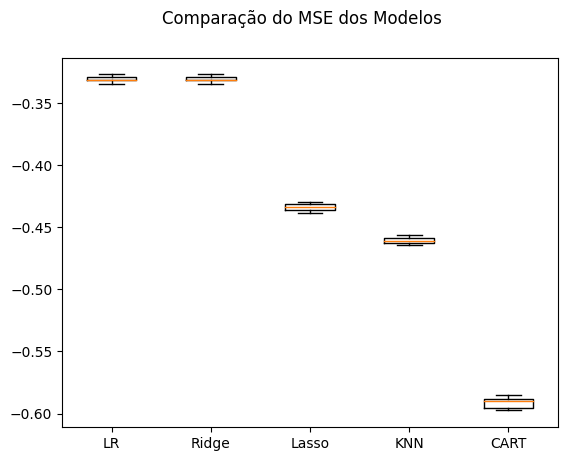

In [96]:
# Avaliando um modelo por vez
for nome, modelo in modelos:
  cv_results = cross_val_score(modelo, X_treino_scaled, y_treino_cod, cv=kfold, scoring='neg_mean_squared_error')
  resultados.append(cv_results)
  nomes.append(nome)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (nome, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
ax.boxplot(resultados) 
ax.set_xticklabels(nomes) 
plt.show()

Com base nos resultados apresentados, o modelo que obteve o melhor resultado em termos de MSE (erro quadrático médio) e RMSE (erro quadrático médio raiz) foi a Regressão Linear (LR) e a Ridge Regression. Ambos os modelos tiveram um MSE de 0.33 e um RMSE de 0.58.

Esses valores indicam que esses modelos tiveram um ajuste relativamente melhor aos dados em comparação com os outros modelos testados.